In [1]:
#
#
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook


#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mpd
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
from eq_params import *
#
from nepal_figs import *
import nepal_figs
import optimizers
#
import random
import geopy
#
#colors_ =  mpl.rcParams['axes.color_cycle']
colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k']		# make sure these are correct...
tzutc = pytz.timezone('UTC')
#

failed while loading urllib and/or urllib. maybe python 3.x?


In [2]:
class orientation_test(object):
    
    def __init__(self, N_ev=20, theta=3.14/4., m=5., lat0=35., lon0=-115., dt=2.,
                     t0=dtm.datetime(2016,1,1, tzinfo=tzutc)):
        L_r = 10.**(.5*m - 1.76)
        R = random.Random()
        #
        d_lat = .1*L_r*math.sin(theta)
        d_lon = .1*L_r*math.cos(theta)/math.cos(lat0)
        dt = dtm.timedelta(days=dt)

        #
        cat = []
        for j in range(N_ev):
            cat += [[t0+dt*j, lon0+j*d_lon*(1.0+R.random()/5.), lat0+j*d_lat*(1.0+R.random()/5.), m, mpd.date2num(t0+dt*j) ]]
        #
        cat = numpy.core.records.fromarrays(zip(*cat), dtype = [('event_date', 'datetime64[us]'),
                                                                ('lon', '>f8'), ('lat', '>f8'), ('mag', '>f8'),
                                                               ('event_date_float', '>f8')])

        cat = gep.make_ETAS_catalog_mpp(cat)
        #
        #etas = gep.ETAS_mpp(catalog=cat, lons=sorted(cat['lon'])[0::len(cat)-1],  lats=sorted(cat['lat'])[0::len(cat)-1]),
        etas = gep.ETAS_mpp(catalog=cat, etas_fit_factor=2.0)

        #
        plt.figure(figsize=(8,6))
        plt.clf()
        plt.plot(cat['lon'], cat['lat'], marker='o', ls='')
        #plt.plot(cat2['lon'], cat2['lat']+.25, marker='o', ls='', color='r')
        #
        #return etas
        self.__dict__.update(locals())

   

etas_prams:  {'D_fract': 1.5, 'mc': 2.5, 'b1': 1.0, 'dmstar': 1.0, 'do_recarray': True, 'd_tau': 2.28, 'b2': 1.5, 'd_lambda': 1.76, 'lats': [32.0, 38.0], 'p': 1.1, 'date_range': ['1990-1-1', None], 'fit_factor': 1.5, 'q': 1.5, 'lons': [-117.0, -114.0], 'incat': None}
R:  <multiprocessing.pool.ApplyResult object at 0x7fc500a039e8>
R:  <multiprocessing.pool.ApplyResult object at 0x7fc500a03a90>
results fetched.
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-12-08 06:23:49.527401+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 20], None)
make_etas():
etas_mpp worker xyz_range:  [0, 7308]
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-12-08 06:23:49.527401+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 20], [0, 7308])
begin make_etas_rtree()
now gather sub-arrays...
len(

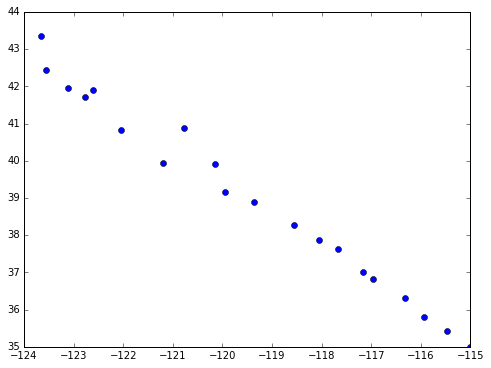

In [3]:
etas = orientation_test()

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:321: RuntimeWarning: divide by zero encountered in log10
  Z = numpy.log10(self.lattice_sites)


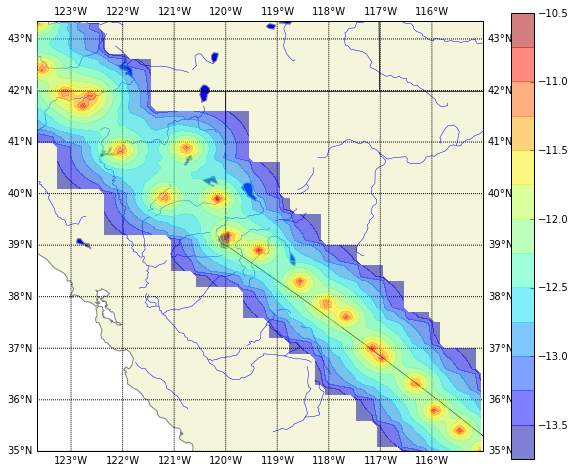

In [4]:
plt.figure(figsize=(10,8))
ax=plt.gca()
etas.etas.make_etas_contour_map(ax=ax)
